<h1 style="font-size:36px;">CNN-LSTM</h1>

CNN-LSTM is a deep learning model that combines both Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) architectures. This model is used in the analysis of temporal data (eg time series). CNN layers apply convolution operations to extract the features of the input data, while LSTM layers keep the information from the past time periods of the data in memory and use it for future predictions. In this way, the CNN-LSTM model can make more accurate predictions by capturing both the characteristics of temporal data and information from past time periods. The CNN-LSTM model gives very successful results in applications where temporal data such as Bitcoin price estimation are used.

CNN-LSTM, hem evrişimli sinir ağı (Convolutional Neural Network - CNN) hem de uzun-kısa süreli bellek (Long Short-Term Memory - LSTM) mimarilerinin birleştirilmesiyle oluşan bir derin öğrenme modelidir. Bu model, zamansal verilerin (örneğin zaman serileri) analizinde kullanılır. CNN katmanları, girdi verilerinin özelliklerini çıkarmak için evrişim işlemleri uygular, LSTM katmanları ise verilerin geçmiş zaman dilimlerindeki bilgilerini hafızasında tutarak gelecekteki tahminler için kullanır. Bu şekilde, CNN-LSTM modeli hem zamansal verilerin özelliklerini hem de geçmiş zaman dilimlerindeki bilgileri yakalayarak daha doğru tahminler yapabilir. Bitcoin fiyatı tahminleme gibi zamansal verilerin kullanıldığı uygulamalarda CNN-LSTM modeli oldukça başarılı sonuçlar vermektedir.


This model is a CNN-LSTM model with a Conv1D layer followed by an LSTM layer followed by two dense layers. The two Conv1D layers are used to learn the properties of the data, while the MaxPooling1D layer reduces the size of the feature maps and reduces computational cost by removing redundant information. The LSTM layer is used to predict the next value, taking into account the timing of historical data. Dense layers are used to give the model a higher learning capacity.

The first layer of the model is the Conv1D layer with the TimeDistributed wrapper. This layer ensures that the same Conv1D weights are used at each time step of the input data. The second layer is also a Conv1D layer. This layer is used in conjunction with a MaxPooling1D layer to reduce the size of feature maps. The Flatten layer then flattens the data to prepare it for entry into the LSTM layer.

The LSTM layer predicts the next output by remembering previous inputs of time series data. Dense layers provide a higher learning capacity and help the model make more accurate predictions. In the last layer, an output value is produced. This model is designed to be used in problems such as time series estimation.


Bu model, bir Conv1D katmanı ardından bir LSTM katmanı ve ardından iki yoğun katmanı içeren bir CNN-LSTM modelidir. İki adet Conv1D katmanı, verilerin özelliklerini öğrenmek için kullanılırken, MaxPooling1D katmanı, özellik haritalarının boyutunu küçültür ve gereksiz bilgiyi çıkararak hesaplama maliyetini azaltır. LSTM katmanı, geçmiş verilerin zamanlamasını dikkate alarak bir sonraki değeri tahmin etmek için kullanılır. Yoğun katmanlar, modele daha yüksek bir öğrenme kapasitesi kazandırmak için kullanılır.

Modelin ilk katmanı TimeDistributed sarmalayıcısı ile Conv1D katmanıdır. Bu katman, girdi verilerinin her bir zaman adımında aynı Conv1D ağırlıklarının kullanılmasını sağlar. İkinci katman da bir Conv1D katmanıdır. Bu katman, özellik haritalarının boyutunu küçültmek için bir MaxPooling1D katmanı ile birlikte kullanılır. Daha sonra Flatten katmanı, verileri düzleştirerek LSTM katmanına giriş için hazırlar.

LSTM katmanı, zaman serisi verilerinin önceki girdilerini anımsayarak bir sonraki çıktıyı tahmin eder. Yoğun katmanlar, daha yüksek bir öğrenme kapasitesi sağlar ve modelin daha doğru tahminler yapmasına yardımcı olur. Son katmanda, bir çıktı değeri üretilir. Bu model, zaman serileri tahminleme gibi problemlerde kullanılmak üzere tasarlanmıştır.

In [1]:
#import libraries
import math

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Conv1D, MaxPooling1D, TimeDistributed
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
#importing the btc data
df=pd.read_csv('merged2_data.csv')
df
#show the data
df

,Date,Close,Currently
0,2014-09-17,457.334015,0.09
1,2014-09-18,424.440002,0.09
2,2014-09-19,394.795990,0.09
3,2014-09-20,408.903992,0.09
4,2014-09-21,398.821014,0.09
...,...,...,...
3158,2023-05-11,27000.789063,5.08
3159,2023-05-12,26804.990234,5.08
3160,2023-05-13,26784.078125,5.08
3161,2023-05-14,26930.638672,5.08


In [3]:
#get the number of rows and columns in the data set
df.shape

(3163, 3)

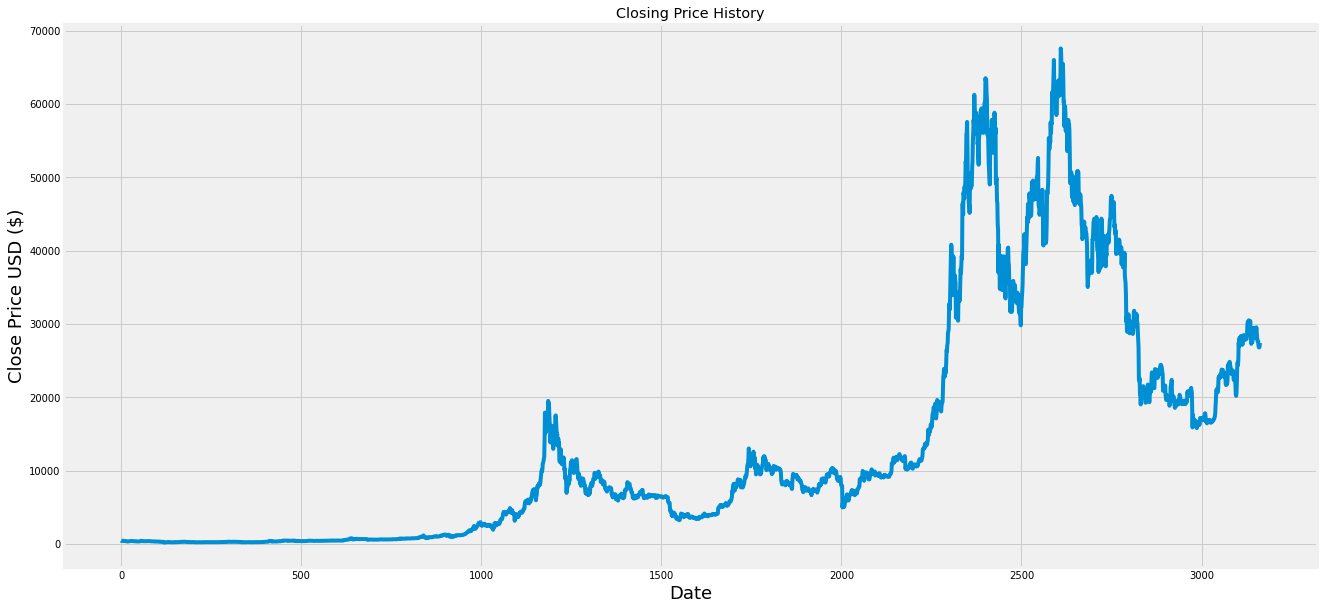

In [4]:
#visualize the closing price history
plt.figure(figsize=(20,10))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#create a new dataframe with only the "Close column"
data = df.filter(['Close', 'Currently'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

2531

In [6]:
#Scale the data (normalization - better performance)
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359, 0.00992063],
       [0.00365546, 0.00992063],
       [0.00321557, 0.00992063],
       ...,
       [0.39481345, 1.        ],
       [0.3969883 , 1.        ],
       [0.40404812, 1.        ]])

In [7]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686991635463]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

In [8]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data (CNN-LSTM expects 4 dimentionals - 2 months of 30 days, total 60 days)
x_train = np.reshape(x_train, (x_train.shape[0], 2, 30, 1))
x_train.shape

(2471, 2, 30, 1)

In [9]:
#build CNN-LSTM model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(None, 1, 1))))
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1))


In [10]:
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50)
model.summary()

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 2/50
78/78 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 3/50
78/78 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/50
78/78 [==============================] - 0s 4ms/step - loss: 7.9016e-04
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 6.9395e-04
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 7.4952e-04
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 5.6915e-04
Epoch 8/50
78/78 [==============================] - 0s 4ms/step - loss: 5.0973e-04
Epoch 9/50
78/78 [==============================] - 0s 4ms/step - loss: 7.0664e-04
Epoch 10/50
78/78 [==============================] - 0s 4ms/step - loss: 5.5680e-04
Epoch 11/50
78/78 [==============================] - 0s 4ms/step - loss: 5.0146e-04
Epoch 12/50
78/78 [==============================] - 0s 4ms/step - loss: 3.6612e-04
Epoch 13/50
7

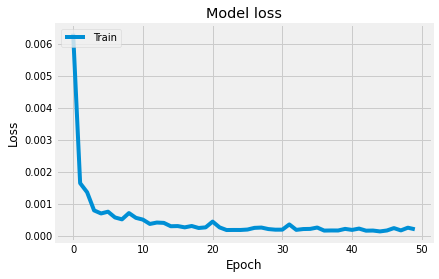

In [12]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
#create the testing data set
#create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], 2, 30, 1))
x_test.shape

(632, 2, 30, 1)

In [21]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = np.reshape(predictions, (632, 1))

# Min-Max ölçeklendirme aralığını al
price_min = scaler.data_min_[0]
price_max = scaler.data_max_[0]

# Tahminleri ters ölçeklendir
predictions = predictions * (price_max - price_min) + price_min



20/20 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error

# Ortalama karesel hata (MSE) hesapla
MSE = mean_squared_error(y_test[:, 0], predictions)
MSE

3568486.7753253565

In [31]:
RMSE =np.sqrt(MSE)
RMSE

1889.0438786130292

In [34]:
from sklearn.metrics import mean_absolute_error

# Ortalama mutlak hata (MAE) hesapla
MAE = mean_absolute_error(y_test[:, 0], predictions)
print(MAE)


1321.0280530315467


In [35]:
R2= r2_score( y_test[:, 0], predictions)
R2

0.9806590666748698

In [36]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNNLSTM_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNNLSTM_ERROR = CNNLSTM_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNNLSTM_ERROR)

         MSE        RMSE         MAE       R2
3.568487e+06 1889.043879 1321.028053 0.980659


<ipython-input-38-2d3135804f7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


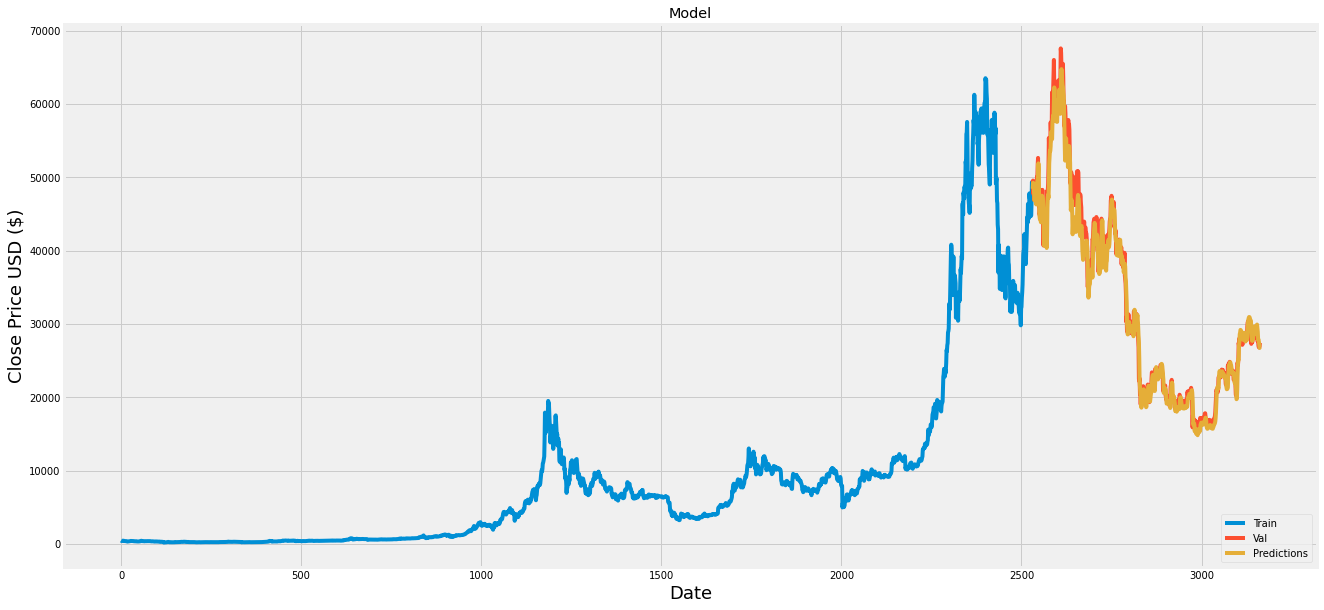

In [38]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-39-19d935e55494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


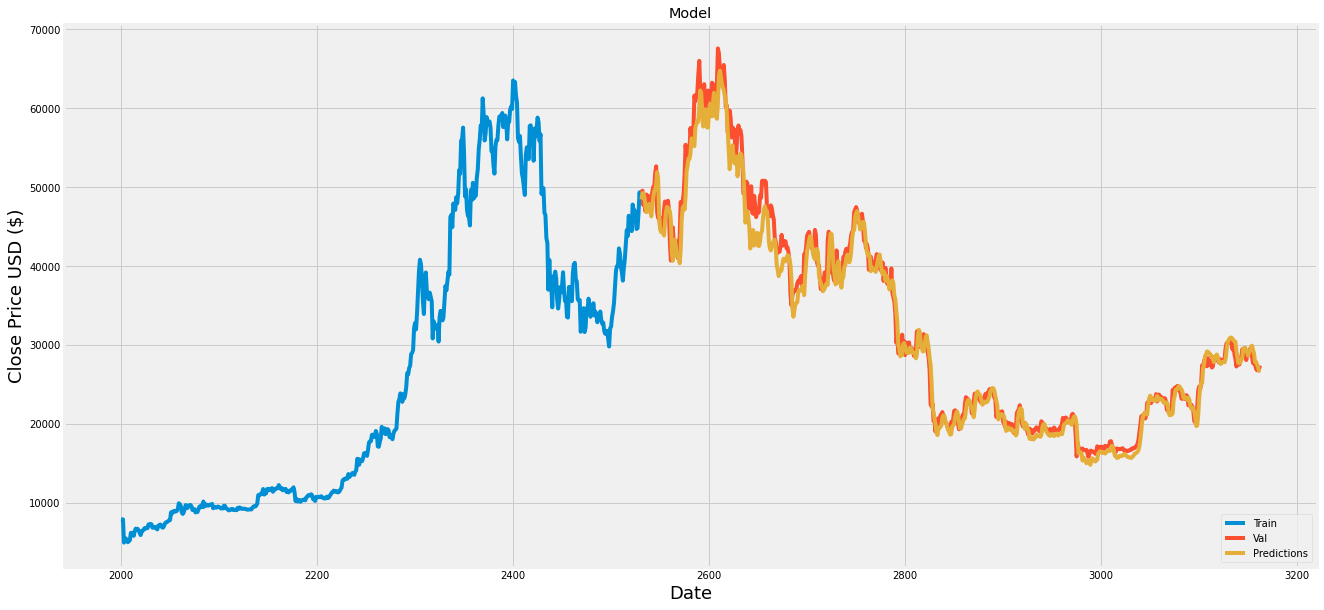

In [39]:
#plot zoomed in
train = data[2000:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
#show the valid and predicted prices
valid

,Close,Currently,Predictions
2531,49321.652344,0.09,48431.933594
2532,49546.148438,0.09,49236.281250
2533,47706.117188,0.09,49217.894531
2534,48960.789063,0.09,48700.296875
2535,46942.218750,0.09,47654.191406
...,...,...,...
3158,27000.789063,5.08,27873.195312
3159,26804.990234,5.08,27532.939453
3160,26784.078125,5.08,27239.013672
3161,26930.638672,5.08,26722.365234


In [41]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNNLSTM_ERROR = pd.DataFrame.from_dict(results, orient='index').T

# Çıktıyı metin dosyasına aktar
output_text = CNNLSTM_ERROR.to_string(index=False)

# Metin dosyasını kaydet
with open('CNNLSTM_ERROR.txt', 'w') as file:
    file.write(output_text)